## Install the Python SDK

In [9]:
!pip install -q -U google-generativeai

## Import Packages

In [10]:
import pathlib
import textwrap

import google.generativeai as genai

from IPython.display import display
from IPython.display import Markdown

def to_markdown(text):
    text = text.replace(".", " *")
    return Markdown(textwrap.indent(text, "> ", predicate = lambda _: True))

In [ ]:
genai.configure(api_key = GOOGLE_API_KEY)

## List of models
* gemini-pro: optimized for text-only prompts
* gemini-pro-vision: optimized for text-and-images prompts

In [12]:
for i, m in zip(range(5), genai.list_tuned_models()):
  print(m.name)

tunedModels/generate-num-7861


In [30]:
for m in genai.list_models():
    print(m)

Model(name='models/chat-bison-001',
      base_model_id='',
      version='001',
      display_name='PaLM 2 Chat (Legacy)',
      description='A legacy text-only model optimized for chat conversations',
      input_token_limit=4096,
      output_token_limit=1024,
      supported_generation_methods=['generateMessage', 'countMessageTokens'],
      temperature=0.25,
      max_temperature=None,
      top_p=0.95,
      top_k=40)
Model(name='models/text-bison-001',
      base_model_id='',
      version='001',
      display_name='PaLM 2 (Legacy)',
      description='A legacy model that understands text and generates text as an output',
      input_token_limit=8196,
      output_token_limit=1024,
      supported_generation_methods=['generateText', 'countTextTokens', 'createTunedTextModel'],
      temperature=0.7,
      max_temperature=None,
      top_p=0.95,
      top_k=40)
Model(name='models/embedding-gecko-001',
      base_model_id='',
      version='001',
      display_name='Embedding Gecko

In [13]:
for m in genai.list_models():
    if 'generateContent' in m.supported_generation_methods:
        print(m.name)

models/gemini-1.0-pro-latest
models/gemini-1.0-pro
models/gemini-pro
models/gemini-1.0-pro-001
models/gemini-1.0-pro-vision-latest
models/gemini-pro-vision
models/gemini-1.5-pro-latest
models/gemini-1.5-pro-001
models/gemini-1.5-pro-002
models/gemini-1.5-pro
models/gemini-1.5-flash-latest
models/gemini-1.5-flash-001
models/gemini-1.5-flash-001-tuning
models/gemini-1.5-flash
models/gemini-1.5-flash-002
models/gemini-1.5-flash-8b
models/gemini-1.5-flash-8b-001
models/gemini-1.5-flash-8b-latest
models/gemini-1.5-flash-8b-exp-0827
models/gemini-1.5-flash-8b-exp-0924
models/gemini-2.0-flash-exp
models/gemini-2.0-flash
models/gemini-2.0-flash-001
models/gemini-2.0-flash-lite-preview
models/gemini-2.0-flash-lite-preview-02-05
models/gemini-2.0-pro-exp
models/gemini-2.0-pro-exp-02-05
models/gemini-exp-1206
models/gemini-2.0-flash-thinking-exp-01-21
models/gemini-2.0-flash-thinking-exp
models/gemini-2.0-flash-thinking-exp-1219
models/learnlm-1.5-pro-experimental


## Generate text from text inputs
For text-only prompts, use the gemini-pro model

In [14]:
model = genai.GenerativeModel('gemini-pro')

The `generate_content` method can handle a wide variety of use cases, including mutli-turn chat and multi-modal input, depending on what the underlying model support text and images as input, and text as output

In [15]:
%%time
response = model.generate_content("What is the meaning of life?")

CPU times: user 8.56 ms, sys: 12.2 ms, total: 20.8 ms
Wall time: 6.07 s


In [16]:
to_markdown(response.text)

> **According to Different Philosophies and Beliefs:**
> 
> * **Stoicism:** To live in harmony with nature and reason, accepting what cannot be changed and focusing on virtues *
> * **Epicureanism:** To seek pleasure and avoid pain, valuing friendship and moderation *
> * **Existentialism:** To create one's own meaning and purpose through choice and action, accepting responsibility for one's life *
> * **Buddhism:** To end suffering through the path of enlightenment, cultivating wisdom, compassion, and non-attachment *
> * **Hinduism:** To fulfill one's dharma (purpose), achieve moksha (liberation from the cycle of rebirth), and ultimately merge with the divine *
> * **Christianity:** To follow the teachings of Jesus Christ and love God and neighbor, striving for salvation and eternal life *
> * **Secular Humanism:** To live a fulfilling and ethical life based on reason, science, and human values, focusing on the betterment of humanity *
> 
> **Personal Perspectives:**
> 
> * To experience joy, love, and connection with others *
> * To make a difference in the world and leave a positive legacy *
> * To learn, grow, and evolve as a person *
> * To contribute to society and help those in need *
> * To find purpose and fulfillment in one's work, hobbies, or passions *
> * To appreciate the beauty and wonder of existence *
> 
> **Scientific and Evolutionary Perspectives:**
> 
> * **Evolutionary Psychology:** To survive, reproduce, and pass on one's genes to future generations *
> * **Positive Psychology:** To enhance well-being, happiness, and resilience *
> * **Neurobiology:** To stimulate reward pathways in the brain and create experiences of pleasure and meaning *
> 
> **Ultimately, the meaning of life is a personal and subjective question that can evolve over time ***

In [17]:
response.prompt_feedback

## Generate text from image and text inputs
Gemini provide a multi-modal (gemini-pro-vision) that accepts both text and image inputs.

In [31]:
model = genai.GenerativeModel('gemini-2.0-flash-exp')

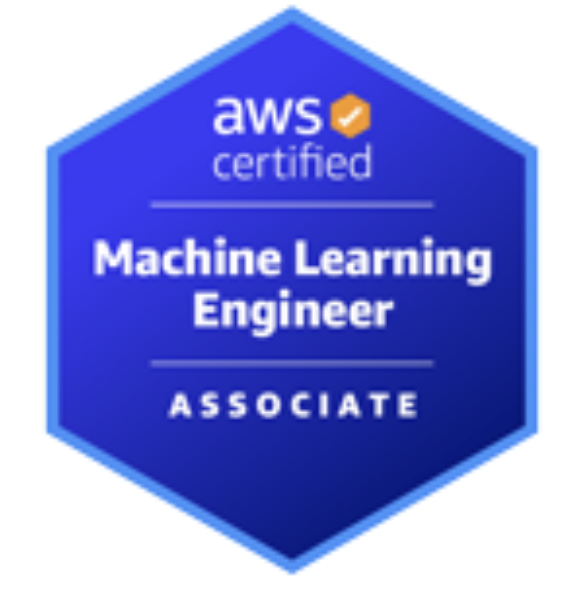

In [32]:
import PIL.Image
img = PIL.Image.open('Image.png')
img

In [36]:
response = model.generate_content(['Write a short description of the image', img])
to_markdown(response.text)

> The image is a badge that indicates certification from Amazon Web Services (AWS) for "Machine Learning Engineer – Associate" * The badge is a blue hexagon with white text * The words "aws certified" are at the top, along with a small orange checkmark, and below them, the words "Machine Learning Engineer" appear in a larger font, with the word "ASSOCIATE" at the bottom *

## Chat Conversations

In [38]:
model = genai.GenerativeModel('gemini-pro')
chat = model.start_chat(history = [])
chat

ChatSession(
    model=genai.GenerativeModel(
        model_name='models/gemini-pro',
        generation_config={},
        safety_settings={},
        tools=None,
        system_instruction=None,
        cached_content=None
    ),
    history=[]
)

In [39]:
response = chat.send_message('In one sentence, explain how a computer works to a young child.')
to_markdown(response.text)

> A computer is like a smart helper that takes instructions from you and uses them to perform tasks or show you information *

In [40]:
chat.history

[parts {
   text: "In one sentence, explain how a computer works to a young child."
 }
 role: "user",
 parts {
   text: "A computer is like a smart helper that takes instructions from you and uses them to perform tasks or show you information."
 }
 role: "model"]